**Proyek Analisis Data: Bike Sharing **

Pertanyaan Bisnis



1.   Bagaimana pertumbuhan sewa sepeda dalam 1 tahun? Apakah perlu penambahan sepeda?
2.  Bagaimana detail pertumbuhan yang terjadi yang dapat digunakan sebagai pedoman untuk meningkatkan kualitas?



Library yang digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**Data** **Wrangling**

Gathering Data

In [ ]:
Day_df = pd.read_csv("/content/day.csv")
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Assesing Data

In [ ]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
Day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", Day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
Day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Cleaning Data

In [ ]:
tanggal_df = pd.to_datetime(Day_df['dteday'], format = '%Y.%m.%d')

**Explaratory Data Analysis (EDA)**

1.   Bagaimana pertumbuhan sewa sepeda dalam 1 tahun? Apakah perlu penambahan sepeda?




In [ ]:
Day_df.groupby(by="yr").cnt.mean().sort_values(ascending=False)

yr
1    5599.934426
0    3405.761644
Name: cnt, dtype: float64

In [ ]:
monthly = pd.pivot_table(Day_df,index=['yr','mnth'],
                         aggfunc={'cnt':'mean'})
monthly

cnt
yr mnth             
0  1     1231.903226
   2     1721.964286
   3     2065.967742
   4     3162.333333
   5     4381.322581
   6     4783.733333
   7     4559.387097
   8     4409.387097
   9     4247.266667
   10    3984.225806
   11    3405.566667
   12    2816.870968
1  1     3120.774194
   2     3556.448276
   3     5318.548387
   4     5807.466667
   5     6318.225806
   6     6761.000000
   7     6567.967742
   8     6919.451613
   9     7285.766667
   10    6414.225806
   11    5088.800000
   12    3990.741935

Sewa sepeda mengalami pertumbuhan dalam 1 tahun. Hal tersebut dapat dilihat dalam tabel di atas, dimana pada tahun ke-2 rata-rata bertambah mencapai ribuan dibandingkan tahun sebelumnya. Lebih jelas lagi dilihat dalam tabel untuk setiap bulan. Pada bulan Februari dan Maret, terdapat penambahan sewa sepeda dari tahun sebelumnya.
Jika melihat dari data di atas, sepertinya perlu dilakukan penambahan sepeda.

2.   Bagaimana detail pertumbuhan yang terjadi yang dapat digunakan sebagai pedoman untuk meningkatkan kualitas?



In [ ]:
Day_df.groupby(by="workingday").cnt.max().sort_values(ascending=False)

workingday
0    8714
1    8362
Name: cnt, dtype: int64

In [ ]:
Day_df.groupby(by="season").cnt.max().sort_values(ascending=False)

season
3    8714
4    8555
2    8362
1    7836
Name: cnt, dtype: int64

In [ ]:
Day_df.groupby(by="weathersit").cnt.max().sort_values(ascending=False)

weathersit
1    8714
2    8362
3    4639
Name: cnt, dtype: int64

In [ ]:
Korelasi = Day_df.corr()
Korelasi

<ipython-input-14-d840cb69f67b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Korelasi = Day_df.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [ ]:
Day_df.cov()

<ipython-input-16-2e3051f3b2db>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Day_df.cov()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,44591.000000,96.693151,91.500000,362.058904,0.569863,-0.006849,-0.426027,-2.471233,5.820548,5.252561,0.492488,-1.843008,39909.582192,2.173278e+05,2.572374e+05
season,96.693151,1.233892,-0.001025,3.188082,-0.001956,-0.006859,0.006452,0.011628,0.067978,0.062067,0.032504,-0.019717,160.472522,7.134020e+02,8.738745e+02
yr,91.500000,-0.001025,0.250342,-0.003096,0.000665,-0.005478,-0.000468,-0.013284,0.004360,0.003759,-0.007885,-0.000458,85.386865,4.639067e+02,5.492936e+02
mnth,362.058904,3.188082,-0.003096,11.915702,0.011073,0.065808,-0.009477,0.081873,0.139142,0.127952,0.109247,-0.055510,291.543755,1.580687e+03,1.872231e+03
holiday,0.569863,-0.001956,0.000665,0.011073,0.027941,-0.034168,-0.019677,-0.003154,-0.000874,-0.000885,-0.000379,0.000082,6.229170,-2.836112e+01,-2.213195e+01
weekday,-0.006849,-0.006859,-0.005478,0.065808,-0.034168,4.019171,0.033381,0.033960,-0.000062,-0.002462,-0.014914,0.002219,82.485415,1.794443e+02,2.619297e+02
workingday,-0.426027,0.006452,-0.000468,-0.009477,-0.019677,0.033381,0.216442,0.015514,0.004485,0.003956,0.001612,-0.000678,-165.483884,2.206011e+02,5.511723e+01
weathersit,-2.471233,0.011628,-0.013284,0.081873,-0.003154,0.033960,0.015514,0.296910,-0.012029,-0.010796,0.045870,0.001668,-92.543836,-2.213751e+02,-3.139189e+02
temp,5.820548,0.067978,0.004360,0.139142,-0.000874,-0.000062,0.004485,-0.012029,0.033508,0.029583,0.003310,-0.002241,68.283781,1.542309e+02,2.225147e+02
atemp,5.252561,0.062067,0.003759,0.127952,-0.000885,-0.002462,0.003956,-0.010796,0.029583,0.026556,0.003249,-0.002319,60.854436,1.383669e+02,1.992213e+02


Dari analisis yang telah dilakukan, dapat diambil kesimpulan sebagai beriku:

*   *Working day* memiliki banyak penyewa dibandingkan dengan non *working day*
*   Musim gugur (*fall*) memiliki banyak penyewa dibandingkan dengan musim lainnya
*   Cuaca cerah memiliki banyak penyewa dibandingkan dengan cuaca yang lain
*   Variabel *temp* dan *atemp* memiliki korelasi yang cukup tinggi terhadap jumlah penyewa sepeda. Sementara itu, *hum* dan *windspeed* berkorelasi negatif terhadap jumlah penyewa.

Jika melihat dari tiga poin pertama, fasilitas dapat ditingkatkan sesuai dengan kriteria yang memiliki nilai tertinggi.





**Visualization & Explanatory Analysis**

Pertanyaan 1:
Bagaimana pertumbuhan sewa sepeda dalam 1 tahun? Apakah perlu penambahan sepeda?

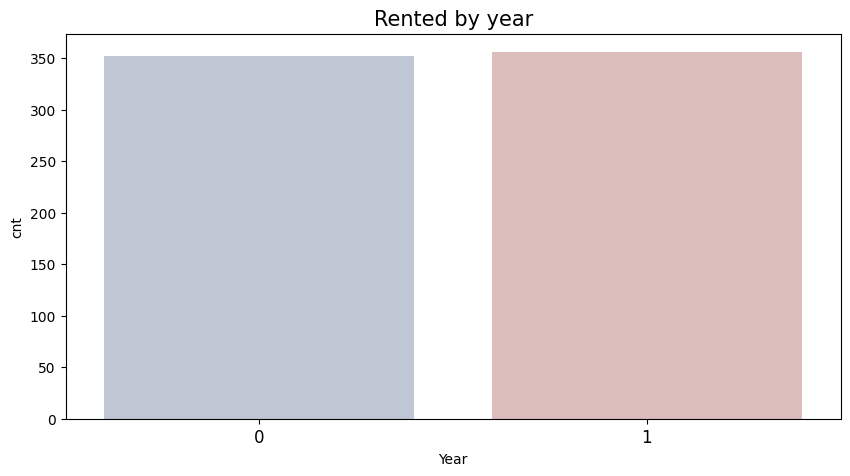

In [ ]:
year_df = Day_df.groupby(by="yr").cnt.nunique().reset_index()
year_df.rename(columns={
    "cnt": "Rented"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="Rented",
    x="yr",
    data=year_df.sort_values(by="Rented", ascending=False),
    palette="vlag"
)
plt.title("Rented by year", loc="center", fontsize=15)
plt.ylabel("cnt")
plt.xlabel("Year")
plt.tick_params(axis='x', labelsize=12)
plt.show()

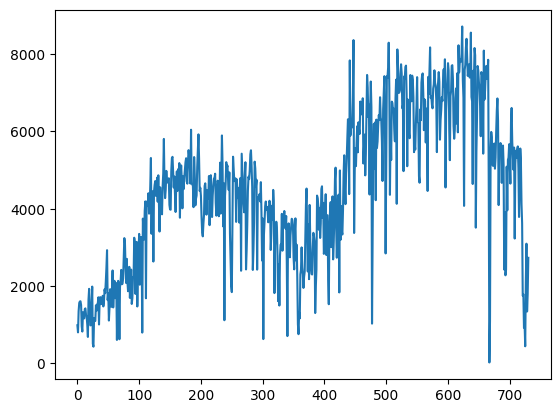

In [ ]:
plt.plot(Day_df["cnt"])

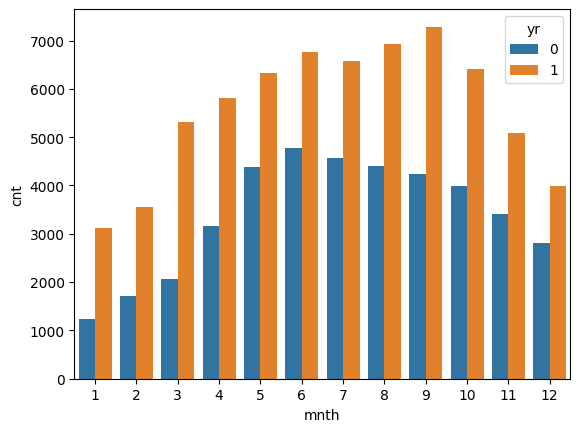

In [ ]:
sns.barplot(data=Day_df, x="mnth", y="cnt", hue="yr", errorbar=None)
plt.show()

Dalam satu tahun, sewa sepeda mengalami peningkatan. Hal tersebut dapat dilihan dari bar plot tahunan, dimana pada tahun ke-2 terdapat sedikit peningkatan. Pertumbuhan tersebut terlihat lebih jelas dari plot cnt, dimana pada paruh ke-2 (lebih dari 360), terdapat peningkatan sewa sepeda. Untuk penambahan sepeda, mungkin dapat ditambah sekitar 10%, dikarenakan belum terlalu banyak peningkatan (masih sekitar 2000-an). Jadi, setiap naik 2000 dapat ditambah 10%. Perhitungan lebih detail dapat dilakukan dengan regresi (untuk mengetahui konstanta yang ditetapkan).

Pertanyaan 2:
Bagaimana detail pertumbuhan yang terjadi yang dapat digunakan sebagai pedoman untuk meningkatkan kualitas?

<Axes: >

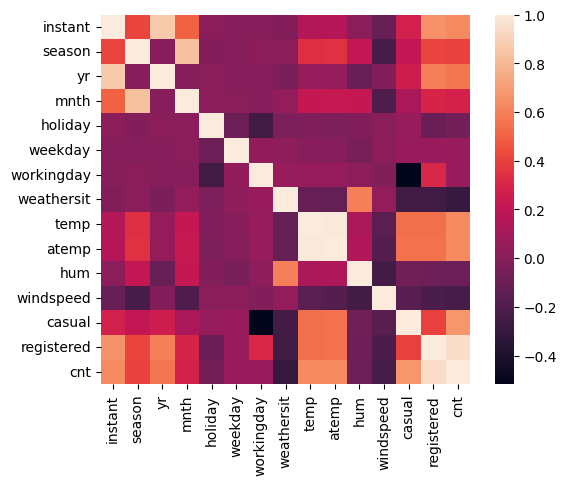

In [ ]:
cor = Korelasi #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'instant'),
  Text(1, 0, 'season'),
  Text(2, 0, 'yr'),
  Text(3, 0, 'mnth'),
  Text(4, 0, 'holiday'),
  Text(5, 0, 'weekday'),
  Text(6, 0, 'workingday'),
  Text(7, 0, 'weathersit'),
  Text(8, 0, 'temp'),
  Text(9, 0, 'atemp'),
  Text(10, 0, 'hum'),
  Text(11, 0, 'windspeed'),
  Text(12, 0, 'casual'),
  Text(13, 0, 'registered'),
  Text(14, 0, 'cnt')])

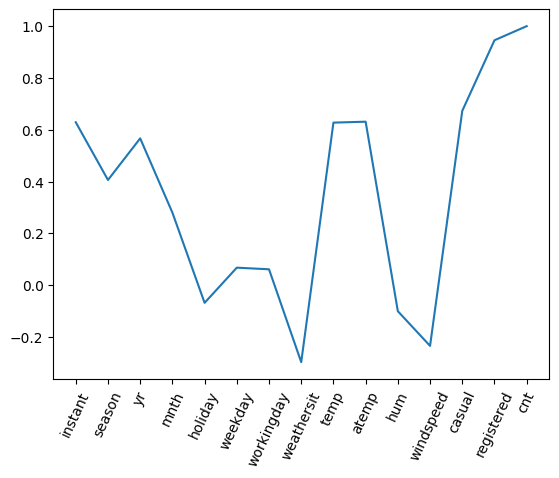

In [ ]:
plt.plot(Korelasi.cnt)
plt.xticks(rotation=65)

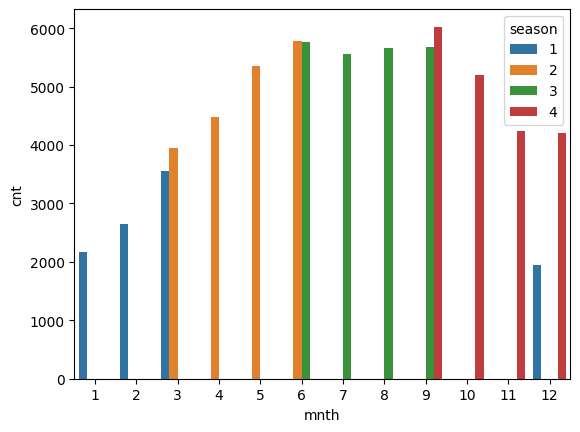

In [ ]:
sns.barplot(data=Day_df, x="mnth", y="cnt", hue="season", errorbar=None)
plt.show()

<Axes: xlabel='instant'>

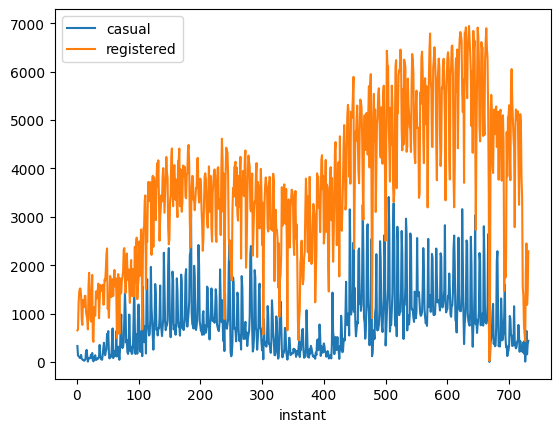

In [ ]:
Day_df.plot(
    x="instant",
    y=["casual","registered"],
    kind="line",
)

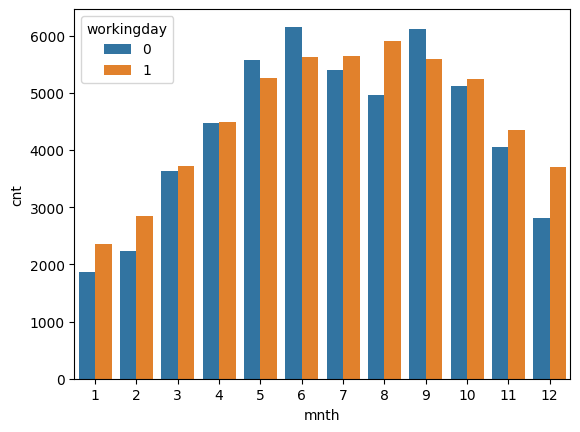

In [ ]:
sns.barplot(data=Day_df, x="mnth", y="cnt", hue="workingday", errorbar=None)
plt.show()

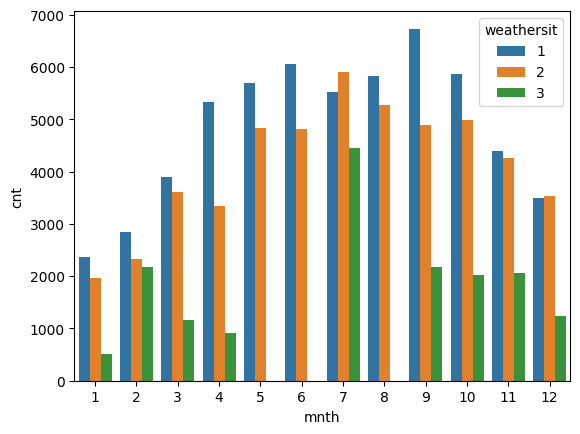

In [ ]:
sns.barplot(data=Day_df, x="mnth", y="cnt", hue="weathersit", errorbar=None)
plt.show()

Temp dan atemp memiliki korelasi tinggi terhadap cnt. Sementara itu berdasarkan musim, fall memiliki banyak penyewa dibandingkan dengan musim lainnya. Situasi tersebut dapat digunakan untuk menambah fasilitas yang membuat nyaman penyewa dan menarik minat lebih banyak penyewa. Jumlah dari penyewa juga dapat menentukan peningkatan kualitas. Meskipun jumlah casual lebih sedikit dari yang telah terdaftar, tapi dalam paruh ke-2 sudah mencapai angka 3000-an casual. Dari data tersebut, mungkin bisa lebih digiatkan lagi untuk pendaftaran penyewa. Terdapat bulan dimana non-weekend lebih banyak penyewa dibandingkan dengan weekend. Akan tetapi, paling banyak dari keseluruhan periode adalah saat weekend. Selain itu, cuaca juga menjadi penentu. Cuaca yang paling ramai dipilih untuk menyewa sepeda adalah saat cerah.

**Conclusion**


*   Dalam satu tahun, sewa sepeda mengalami peningkatan. Dari analisis dan visualisasi yang telah dilakukan, peningkatan tersebut cukup besar. Oleh karena itu, penambahan sepeda dan peningkatan kualitas perlu dipertimbangkan.
*   Dari korelasi, temp dan atemp memiliki korelasi yang tinggi terhadap jumlah penyewa. Selain itu, hasil terbaik dari setiap variabel seperti season, weathersit, dan working day juga dapat menjadi pedoman untuk meningkatkan kualitas.






In [ ]:
Day_df.to_csv("all_data.csv", index=False)